<a href="https://colab.research.google.com/github/pchernic/Imbalanced_data/blob/main/%5BAlgorithms_for_Imbalanced_data%5D_Vehicle_Insurance_Claim_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Insurance Claim Fraud Detection

In order to reduce costs, an insurance company is restructuring the process of fraud analysis for automobile insurance claims. This type of fraud occurs as follows: the policyholder files an insurance claim, alleging an accident and damages that did not actually happen. In reality, these damages were somehow simulated.

The process of fraud analysis consumes time and effort from the company's analysts. Typically, this process is carried out on a random sample of all received claims. However, the insurance company aims to be more accurate in its decisions while minimizing the number of fraud cases.

Your role as a data scientist is to develop a model capable of identifying potential fraud for each new insurance claim. This way, the team of analysts can focus on potential fraud cases rather than a random sample.

Here's the translation of the provided text into English:

| Column               | Description                                                                            |
| -------------------- | -------------------------------------------------------------------------------------- |
| Month                | Month of the accident                                                                  |
| WeekOfMonth          | Week of the month of the accident                                                      |
| DayOfWeek            | Day of the week of the accident                                                         |
| Make                 | Vehicle make                                                                           |
| AccidentArea         | Accident area                                                                          |
| DayOfWeekClaimed     | Day of the week of the insurance claim                                                 |
| MonthClaimed         | Month of the insurance claim                                                            |
| WeekOfMonthClaimed   | Week of the month of the insurance claim                                                |
| Sex                  | Gender of the insured                                                                 |
| MaritalStatus        | Marital status                                                                         |
| Age                  | Age                                                                                    |
| Fault                | At-fault party (who caused the error)                                                   |
| PolicyType           | Policy type                                                                            |
| VehicleCategory      | Vehicle category                                                                       |
| VehiclePrice         | Vehicle price                                                                          |
| FraudFound_P         | Whether fraud is found (1) or not (0)                                                   |
| PolicyNumber         | Policy number                                                                          |
| RepNumber            | Number between 1 and 16                                                                |
| Deductible           | Insurance cost                                                                         |
| DriverRating         | Driver rating                                                                          |
| Days_Policy_Accident | Total days between policy acquisition and accident occurrence                           |
| Days_Policy_Claim    | Total days between policy acquisition and accident reporting                            |
| PastNumberOfClaims   | Number of previous claims made by the vehicle owner                                      |
| AgeOfVehicle         | Vehicle age                                                                            |
| AgeOfPolicyHolder    | Age of the policyholder                                                                |
| PoliceReportFiled    | Whether the accident was reported to the police                                         |
| WitnessPresent       | Whether there were witnesses                                                           |
| AgentType            | Internal means fraud committed by people working for the insurer                         |
| NumberOfSuppliments  | Vehicle damages not registered at the time of the claim                                   |
| AddressChange_Claim  | Whether the policyholder changed their address after reporting an accident and how long after |
| NumberOfCars         | Number of cars involved in the accident                                                 |
| Year                 | Year in which the accident occurred                                                     |
| BasePolicy           | Type of insurance, identical to PolicyType                                              |


dataset: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

# Methodology


![Figura-3-Fases-do-Modelo-CRISP-DM_Q640[1].jpg](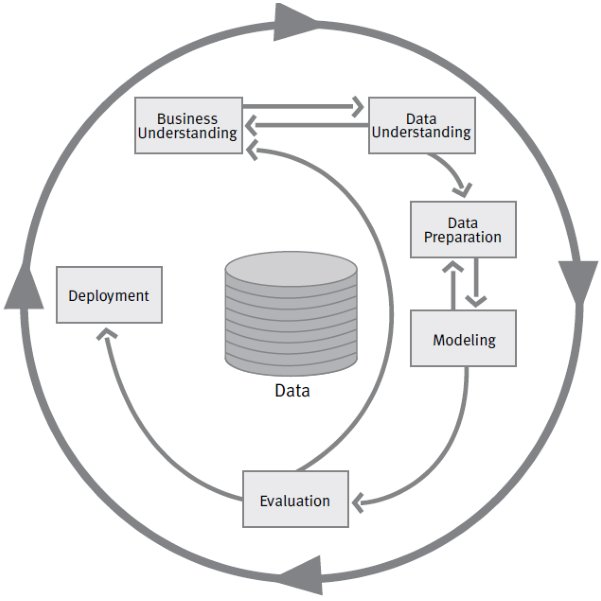)

# Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# 1.0 Data Understanding

## 1.1 Data Ingestion

In [ ]:
df = pd.read_csv('vehicle-insurance-claim.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## 1.2 Dimensions

In [ ]:
df.shape

(15420, 33)

## 1.3 Data types

In [ ]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [ ]:
df['PolicyNumber'] = df['PolicyNumber'].astype('object')

## 1.4 Class distribution

In [ ]:
df['FraudFound_P'].value_counts(normalize=True) * 100

0    94.014267
1     5.985733
Name: FraudFound_P, dtype: float64

## 1.5 Missing Data

In [ ]:
df.isna().sum().sum()

0

## 1.6 Duplicated Data

In [ ]:
df[df.duplicated()].shape[0]

0

## 1.7 Data description

### Numeric Data


In [ ]:
df.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Age,15420.0,39.855707,13.492377,0.0,31.0,38.0,48.0,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.0,0.0,0.0,1.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.0,8.0,12.0,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.0,400.0,400.0,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.0,2.0,3.0,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.0,1995.0,1996.0,1996.0


### Categoric Data

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [ ]:
# Remove PolicyNumber
# OneHot Encoding
# StandardScaling

# 2.0 Data Preparation

In [ ]:
SEED = 42

## 2.1 Train-test split

In [ ]:
X = df.drop(columns=['PolicyNumber', 'FraudFound_P'])
y = df['FraudFound_P']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)

## 2.2 Pre-Processing and Pipeline

In [ ]:
ct = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), selector(dtype_include=['object'])),
        ('sse', StandardScaler(), selector(dtype_include=['int64', 'float64']))
    ]
)

# 3.0 Modeling

## 3.1 Setting Algorithms

In [ ]:
algoritmos_ml = [
    ['LR', LogisticRegression(random_state=42)],
    ['KNN', KNeighborsClassifier()],
    ['DT', DecisionTreeClassifier(random_state=42)]
]

## 3.2 Defining Balancing Algorithms

In [ ]:
algoritmos_balanceamento = [
    ['SEM', None],
    ['ROS', RandomOverSampler(random_state=42)],
    ['SMT', SMOTE(random_state=42)],
    ['ASY', ADASYN(random_state=42)],
    ['RUS', RandomUnderSampler(random_state=42)],
    ['NMI', NearMiss()]
]

## 3.3 Building automatic Pipelines

In [ ]:
l_pipes = []

for modelo in algoritmos_ml:
  for algo_balanc in algoritmos_balanceamento:
    if algo_balanc[0] == 'SEM':
      pipeline = Pipeline(
        [
            ('pp', ct),
            (modelo[0], modelo[1])
        ]
      )
    else:
      pipeline = Pipeline(
        [
            ('pp', ct),
            (algo_balanc[0], algo_balanc[1]),
            (modelo[0], modelo[1])
        ]
      )

    l_pipes.append(pipeline)

# 4.0 Evaluation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [ ]:
l_results = []

nomes_ml = [algo[0] for algo in algoritmos_ml]
nomes_tec_balanc = [algo[0] for algo in algoritmos_balanceamento]

i = 0

for nome_ml in nomes_ml:
  for nome_tec_balanc in nomes_tec_balanc:
    print(nome_ml, nome_tec_balanc)

    res = cross_validate(l_pipes[i], X_train, y_train, cv=skf, scoring='f1', n_jobs=-1)

    l_results.append([nome_ml,
                      nome_tec_balanc,
                      np.round(res['test_score'].mean(), 4),
                      np.round(res['test_score'].std(), 4)])
    i += 1

LR SEM
LR ROS
LR SMT
LR ASY
LR RUS
LR NMI
KNN SEM


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KNN ROS


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KNN SMT
KNN ASY


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KNN RUS
KNN NMI
DT SEM
DT ROS
DT SMT
DT ASY
DT RUS
DT NMI


In [ ]:
df_res = pd.DataFrame(l_results, columns=['ML', 'BALANCEAMENTO', 'MÉDIA F1', 'DESVIO F1']).sort_values(by=['MÉDIA F1'], ascending=False)
df_res.reset_index(drop=True)

,ML,BALANCEAMENTO,MÉDIA F1,DESVIO F1
0,LR,SMT,0.2356,0.0048
1,LR,RUS,0.2318,0.0072
2,LR,ROS,0.2313,0.0025
3,LR,ASY,0.2308,0.0054
4,DT,RUS,0.2127,0.0154
5,DT,ROS,0.2064,0.0399
6,DT,SEM,0.1989,0.0111
7,DT,SMT,0.1869,0.0278
8,DT,ASY,0.1746,0.0361
9,KNN,RUS,0.1722,0.0089


# 5.0 Deployment

In [ ]:
from sklearn.metrics import f1_score

estimator = l_pipes[2]
estimator.fit(X_train, y_train)

y_preds = estimator.predict(X_test)

f1_score(y_true=y_test, y_pred=y_preds)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.22181146025878007